<a href="https://colab.research.google.com/github/khatrikhushboo/Chatbot_using_python/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE 599 HW 1: Gradient Descent

Your task in this Colab notebook is to fill out the sections that are specified by **TODO** (please search the keyword `TODO` to make sure you do not miss any).

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use(['ggplot'])

## Gradient Descent for Linear Regression

Given two vectors, X and Y, that represent the input and output values of a linear relationship, we can fit a line to this data to predict the output for other values of X. This can be done by finding the parameters $w$ and $b$ of the line, such that the line minimizes the squared error between the predicted and actual output values.

The equation for the line is:

\begin{equation}
\hat{y} = w \cdot x + b
\end{equation}

where:

* $\hat{y}$ is the predicted output value.
* $w$ is the slope
* $b$ is the intercept

Let's use Gradient Descent to find the best values for $\theta$ as defined below:

\begin{equation}
\theta = \begin{bmatrix} w \\ b\end{bmatrix} \end{equation}


## Create Data

Let's generate some data with:

\begin{equation} \theta = \begin{bmatrix} 2 \\ 3 \end{bmatrix} \end{equation}

We will use this data to fit the line and then use it to predict the output for other values of $x$.
*   `number_of_samples` is an integer variable
*   X is a vector of `number_of_samples` numbers between 1, 100
*   Y is a vector of `number_of_samples` numbers where each $y = w \cdot x + b$ plus some noise, which is a random value between 0 and 1.


In [10]:
number_of_samples = 100

X = 2 * np.random.rand(number_of_samples, 1)
y = 2 * X + np.random.rand(number_of_samples, 1) + 3

theta_guess = np.array([[1.0], [1.0]])
learning_rate = 0.001
num_iterations = 500

final_cost = {}
final_theta = {}

Plot and visualize your data.

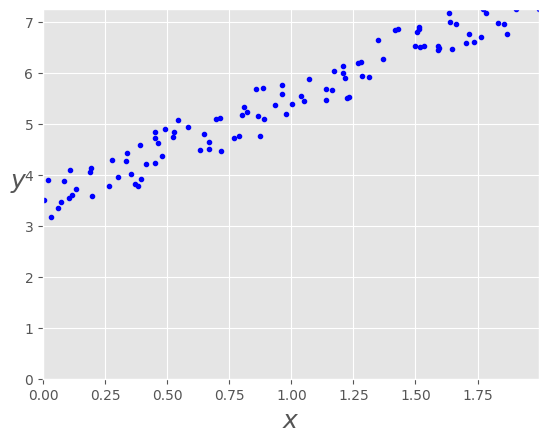

In [11]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ = plt.axis([0,np.max(X),0,np.max(y)])

## Gradient Descent Implementation

The equation for calculating cost function and gradients are as shown below.

Make prediction:

\begin{equation}
\hat{y} =w \cdot x + b
\end{equation}

Mean squared error:

\begin{equation}
J(w, b) = \text{MSE}(w, b) = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 = \frac{1}{n} \sum_{i=1}^n (e_i)^2
\end{equation}

where residul error is
\begin{equation}
e_i=\hat{y}_i - y_i
\end{equation}

Gradient:

\begin{equation}
\nabla J(w, b) = \left( \frac{\partial J}{\partial w}, \frac{\partial J}{\partial b} \right)
\end{equation}

Apply chain rule:

\begin{equation}
\nabla J(w, b) = \left( \sum_{i=1}^n (\frac{\partial J}{\partial e_i} \cdot \frac{\partial e_i}{\partial w}), \sum_{i=1}^n(\frac{\partial J}{\partial e_i} \cdot \frac{\partial e_i}{\partial b}) \right)

= \left( \frac{2}{n} \sum_{i=1}^n e_i \times {x}_i, \frac{2}{n} \sum_{i=1}^n e_i \times 1 \right)
\end{equation}

Replace $e_i$:

\begin{equation}
\nabla J(w, b) = \left( \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \times {x}_i, \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \times 1 \right)
\end{equation}

### **TODO 1:**
If we define the residual error as $(y_i - \hat{y}_i)$, will the graident equation $\nabla J(w, b)$ change? Show your derive.

Your answer: Yes, gradient equation changes as shown below

prediction:

\begin{equation}
\hat{y} =w \cdot x + b
\end{equation}

Mean squared error:

\begin{equation}
J(w, b) = \text{MSE}(w, b) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^n (e_i)^2
\end{equation}

where residul error is
\begin{equation}
e_i= y_i- \hat{y}_i
\end{equation}

Gradient:

\begin{equation}
\nabla J(w, b) = \left( \frac{\partial J}{\partial w}, \frac{\partial J}{\partial b} \right)
\end{equation}

Applying chain rule and substituting derivative values as shown in above cell.

\begin{equation}
\nabla J(w, b) = \left( \frac{2}{n} \sum_{i=1}^n ( y_i - \hat{y}_i) \times {-x}_i, \frac{2}{n} \sum_{i=1}^n ( y_i - \hat{y}_i) \times -1 \right)
\end{equation}

### **TODO 2:**

In the next cell, write the Python code for the following functions:

In [12]:
def calculate_prediction_residuals(theta, X, y):
    """
    Calculate the predictions and residuals for a linear regression model.

    Parameters:
    - theta (numpy.ndarray): Parameter vector of shape (num_features,).
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features)
     Each row represents a sample, and each column represents a feature.
                         The last column should be filled with ones for the intercept term.
                         Example:
                         [[feature_1_sample_1, feature_2_sample_1, 1],
                          [feature_1_sample_2, feature_2_sample_2, 1],
                          ...
                          [feature_1_sample_n, feature_2_sample_n, 1]]
    - y (numpy.ndarray): Target values of shape (num_samples,).

    Returns:
    - predictions (numpy.ndarray): Model predictions of shape (num_samples,).
    - residuals (numpy.ndarray): Model residuals of shape (num_samples,).
    """

    predictions = X@theta
    residuals= predictions - y
    return predictions, residuals


def calculate_cost(theta, X, y):
    """
    Calculate the cost (Mean Squared Error) for a linear regression model.

    Parameters:
    - theta (numpy.ndarray): Parameter vector of shape (num_features,)
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features)
    - y (numpy.ndarray): Target values of shape (num_samples,)

    Returns:
    - cost (float): Computed cost value
    """
    _,residuals= calculate_prediction_residuals(theta, X, y)
    cost = (1/X.shape[0])* np.sum(residuals**2)
    return cost

def calculate_gradient(X, residuals):
    """
    Calculate the gradient for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features)
    - residuals (numpy.ndarray): Residuals (difference between predictions and target values) of shape (num_samples,).

    Returns:
    - gradient (numpy.ndarray): Gradient vector of shape (num_features,).
    """
    gradient = (2/X.shape[0]) * X.T @ residuals

    return gradient

### **TODO 3:**
In the next cell, write the Python code to implement Gradient Descent.

In [13]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    """
    Perform gradient descent to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The last column should be filled with ones for the intercept term.
                         Example:
                         [[feature_1_sample_1, feature_2_sample_1, 1],
                          [feature_1_sample_2, feature_2_sample_2, 1],
                          ...
                          [feature_1_sample_n, feature_2_sample_n, 1]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector of shape (num_features,).
    - learning_rate (float): Learning rate for gradient descent.
    - num_iterations (int): Number of iterations for gradient descent.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (list): List of cost values over iterations.
    - theta_history (list): List of parameter vectors over iterations.
    """
    cost_history = []  # To store the cost at each iteration
    theta_history = []  # To store the parameter vector at each iteration

    for iteration in range(num_iterations):
        predictions, residuals = calculate_prediction_residuals(theta, X, y)
        gradient = calculate_gradient(X, residuals)
        theta = theta - learning_rate * gradient
        cost = calculate_cost(theta, X, y)
        cost_history.append(cost)
        theta_history.append(theta.copy())


    return theta, cost_history, theta_history

## Gradient Descent Virtualization

In the next cell, run the GD implementation, store the cost for each iteration and plot the cost vs. iterations.

Start:
w:          1.000,
b:          1.000
(100, 2)
(2, 1)
End:
w:          2.432,
b:          2.537
Final cost/MSE:  0.446


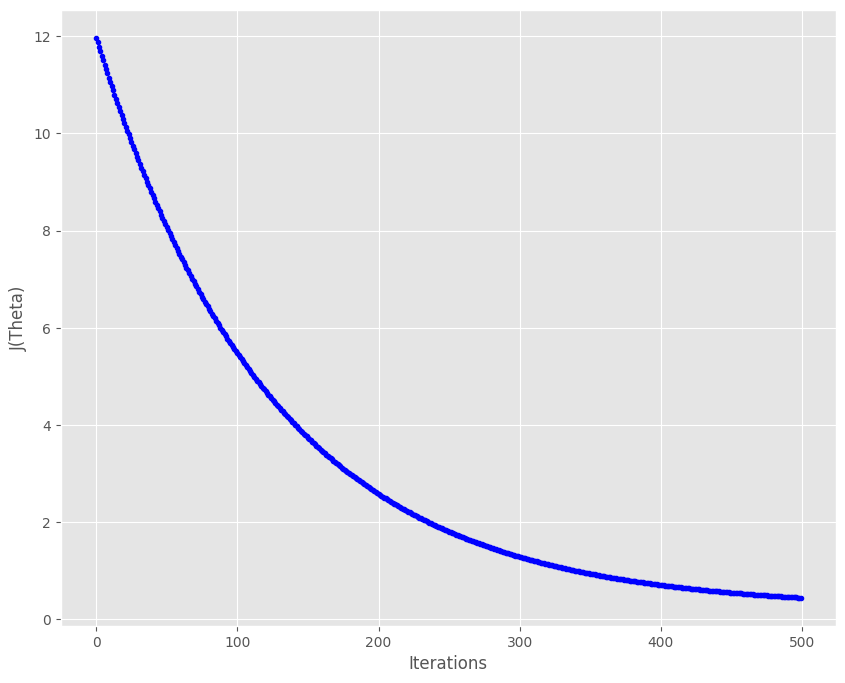

In [14]:
theta = theta_guess.copy()

print("Start:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)

# Add a column of ones to the feature matrix X:
X_b = np.c_[X, np.ones((len(X), 1))]

print(X_b.shape)
print(theta.shape)
# Run Gradient Descent:
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate, num_iterations
)
final_theta['GD']= theta


print("End:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))
final_cost['GD']= cost_history[-1]

fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(num_iterations),cost_history,'b.')

To have a better understanding of how gradient descent actually works, we build a function that virtualizes the training dynamics for different iterations and learning rates combination.

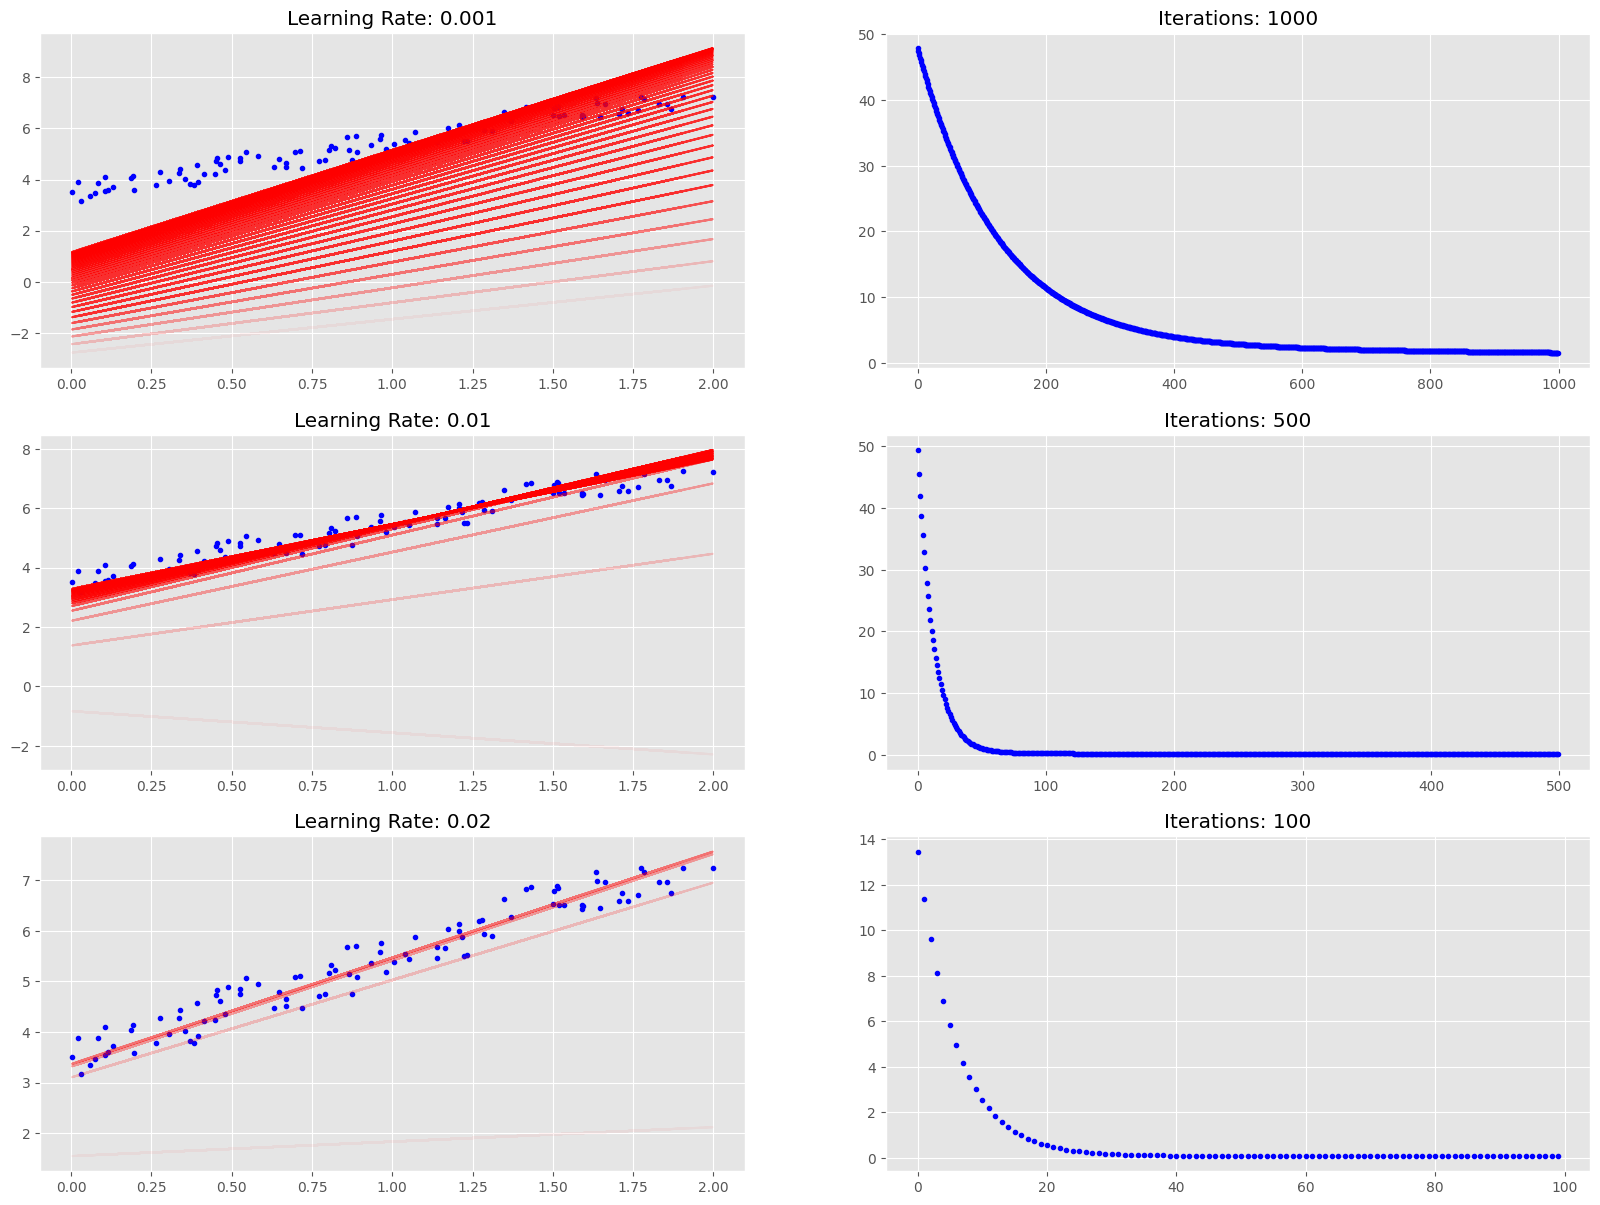

In [15]:
def plot_gradient_descent(
    num_iterations, learning_rate, X_b, y, data_axis, cost_axis=None
):
    """
    Visualize gradient descent optimization for linear regression.

    Parameters:
    - num_iterations (int): Number of iterations for gradient descent.
    - learning_rate (float): Learning rate for gradient descent.
    - X_b (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - data_axis (matplotlib Axis): Axis to visualize the data points and regression lines.
    - cost_axis (matplotlib Axis): Optional axis to visualize the cost history vs. iterations.

    """
    # Plot the data points as blue dots
    data_axis.plot(
        # Assuming the second column is for the intercept term, select the
        # first column.
        X_b[:, 0], y, "b."
    )
    # Initialize random theta values from a standard normal distribution
    theta = np.random.randn(2, 1)

    # Initial transparency value for plotting regression lines
    transparency = 0.05

    # Initialize an array to store cost history during iterations
    cost_history = np.zeros(num_iterations)

    # Loop through each iteration
    for i in range(num_iterations):
        # Compute predictions using the current theta values
        predictions_prev = X_b.dot(theta)

        # Perform one iteration of gradient descent to update theta values
        theta, current_cost, _ = gradient_descent(X_b, y, theta, learning_rate, 1)

        # Compute predictions using the updated theta values
        predictions = X_b.dot(theta)

        # Store the cost value after the current iteration
        cost_history[i] = current_cost[0]

        # Plot the regression line with adjusted transparency
        if i % 25 == 0:
            data_axis.plot(
                X_b[:, 0], predictions, "r-", alpha=transparency
            )  # Assuming the first column is for the intercept term
            if transparency < 0.8:
                transparency += 0.15

    # If provided, plot cost history vs. iterations
    if cost_axis is not None:
        cost_axis.plot(range(num_iterations), cost_history, "b.")


# Create a figure with subplots for visualization
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# List of iteration and learning rate pairs to iterate through
number_of_iteration_learning_rate_pairs = [(1000, 0.001), (500, 0.01), (100, 0.02)]

# Initialize the subplot count for positioning
subplot_count = 0

# Loop through each iteration and learning rate pair
for number_of_iterations, learning_rate in number_of_iteration_learning_rate_pairs:
    # Increment the subplot count and create data and cost axes
    subplot_count += 1
    data_axis = fig.add_subplot(4, 2, subplot_count)
    subplot_count += 1
    cost_axis = fig.add_subplot(4, 2, subplot_count)

    # Set titles for the data and cost axes
    data_axis.set_title("Learning Rate: {}".format(learning_rate))
    cost_axis.set_title("Iterations: {}".format(number_of_iterations))

    # Call the function to visualize gradient descent
    plot_gradient_descent(
        number_of_iterations, learning_rate, X_b, y, data_axis, cost_axis
    )

## Stochastic Gradient Descent

The main difference between SGD and GD is that SGD uses a **single training example** to update the model parameters at each iteration, while GD uses all of the training examples.


* SGD is less computationally expensive than GD and can converge faster. However, SGD can be more noisy than GD, which means that it may not always converge to the global minimum of the function.
* GD is more robust to outliers and is less likely to get stuck in local minima. However, GD can be more computationally expensive than SGD and may take longer to converge.


### **TODO 4:**
In the next cell, write a function to implement SGD.

In [16]:
def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    """
    Perform stochastic gradient descent to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The last column should be filled with ones for the intercept term.
                         Example:
                         [[feature_1_sample_1, feature_2_sample_1, 1],
                          [feature_1_sample_2, feature_2_sample_2, 1],
                          ...
                          [feature_1_sample_n, feature_2_sample_n, 1]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector.
    - learning_rate (float): Learning rate for stochastic gradient descent.
    - iterations (int): Number of iterations for stochastic gradient descent.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (numpy.ndarray): Array of cost values over iterations.
    """


    return theta, cost_history

Run your SGD implementation and plot the cost vs iteration.

Start:
w:          1.000,
b:          1.000
End:
w:          1.000,
b:          1.000
Final cost/MSE:  0.446


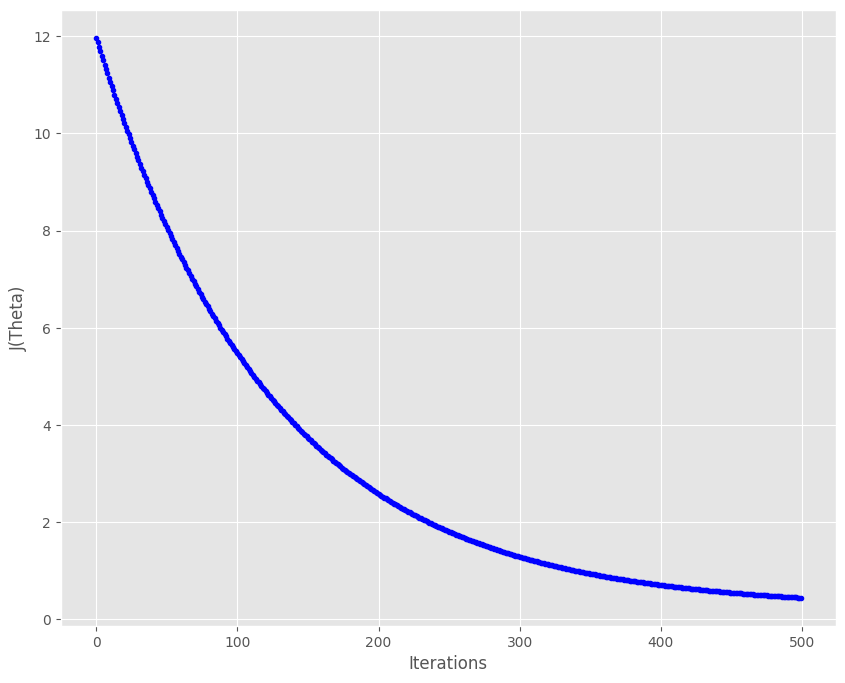

In [17]:
theta = theta_guess.copy()


print("Start:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)

X_b = np.c_[X, np.ones((len(X), 1))]

theta, cost_history = stochastic_gradient_descent(
    X_b, y, theta, learning_rate, num_iterations
)
final_theta['SGD']= theta

print("End:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))
final_cost['SGD']= cost_history[-1]

fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(num_iterations),cost_history[:num_iterations],'b.')

## Stochastic Gradient Descent with Momentum

Stochastic Gradient Descent (SGD) with momentum is an optimization technique that incorporates momentum to enhance the convergence of the optimization process. It is particularly useful for training machine learning models, including neural networks. The momentum term helps to smooth out variations in the gradient updates and accelerates convergence along the steepest direction.

In SGD with momentum, the update rule for the parameters involves a velocity term that accumulates a fraction of the previous gradients. This velocity term adds inertia to the updates, helping the optimization process to move more consistently and smoothly through the optimization landscape. The formula for the update step is as follows:

Velocity Update:

\begin{equation}
v_t = \beta \cdot v_{t-1} + (1 - \beta) \cdot \nabla J(\theta_t)
\end{equation}


Parameter Update:

\begin{equation}
\theta_{t+1} = \theta_t - \alpha \cdot v_t
\end{equation}

* $v_t$ is the velocity at iteration $t$.
* $\beta$ is the momentum parameter between 0 and 1, controlling the retention of previous velocity.
* $\nabla J(\theta_{t})$ is the gradient of the cost function at iteration $t$ with respect to the parameters $\theta_{t}$
* $\alpha$ is the learning rate.

The velocity term $v_t$ accumulates a fraction of the previous velocity $v_{t-1}$ and adds the current gradient update $\nabla J(\theta)$
 scaled by $(1-\beta)$. The parameters $\theta_{t+1}$ are then updated by subtracting the scaled velocity term.

### **TODO 5:**
In the next cell, implement the SGD with Momentum.


In [18]:
def stochastic_gradient_descent_with_momentum(X, y, theta, learning_rate=0.01, momentum=0.9, iterations=10):
    """
    Perform stochastic gradient descent with momentum to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The last column should be filled with ones for the intercept term.
                         Example:
                         [[feature_1_sample_1, feature_2_sample_1, 1],
                          [feature_1_sample_2, feature_2_sample_2, 1],
                          ...
                          [feature_1_sample_n, feature_2_sample_n, 1]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector.
    - learning_rate (float): Learning rate for stochastic gradient descent.
    - momentum (float): Momentum coefficient.
    - iterations (int): Number of iterations for stochastic gradient descent.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (numpy.ndarray): Array of cost values over iterations.
    """


    return theta, cost_history

Call your implementaiton of SGD with Momentum and plot the Cost vs iteration.

Start:
w:          1.000,
b:          1.000
End:
w:          1.000,
b:          1.000
Final cost/MSE:  0.446


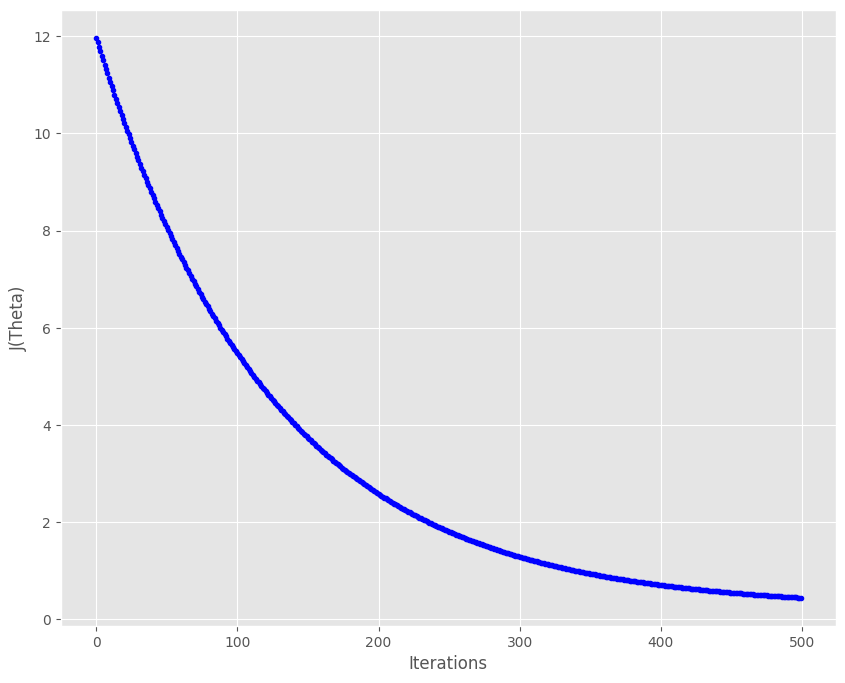

In [19]:
theta = theta_guess.copy()
momentum = 0.9


print("Start:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
X_b = np.c_[X, np.ones((len(X), 1))]
theta, cost_history = stochastic_gradient_descent_with_momentum(
    X_b, y, theta, learning_rate, momentum, num_iterations
)
final_theta['SGDM']= theta

print("End:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))
final_cost['SGDM']= cost_history[-1]

fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(num_iterations),cost_history[:num_iterations],'b.')

# Mini Batch Stochastic Gradient Descent

Mini-batch stochastic gradient descent (MBSGD) is a variation of stochastic gradient descent (SGD) where updates are made using small batches of data instead of single examples.

This strikes a balance between the efficiency of using the entire dataset (batch gradient descent) and the randomness of SGD.

MBSGD computes gradients and updates model parameters in each iteration using a randomly selected mini-batch of data.

This approach can lead to faster convergence and better utilization of computational resources compared to traditional SGD or full-batch gradient descent.

The size of the mini-batch is a tunable hyperparameter that influences the trade-off between convergence speed and noise in the updates.

### **TODO 6:**
In the next cell, implement MBSGD.

In [20]:
def minibatch_gradient_descent(X, y, theta, learning_rate=0.01, num_iterations=10, batch_size=20):
    """
    Perform mini-batch gradient descent to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The last column should be filled with ones for the intercept term.
                         Example:
                         [[feature_1_sample_1, feature_2_sample_1, 1],
                          [feature_1_sample_2, feature_2_sample_2, 1],
                          ...
                          [feature_1_sample_n, feature_2_sample_n, 1]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector of shape (num_features,).
    - learning_rate (float): Learning rate for gradient descent.
    - num_iterations (int): Number of iterations for gradient descent.
    - batch_size (int): Size of each mini-batch.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (list): List of cost values over iterations.
    """


    return theta, cost_history

Run your implementation and plot the cost vs iteration.

Start:
w:          1.000,
b:          1.000
End:
w:          1.000,
b:          1.000
Final cost/MSE:  0.446


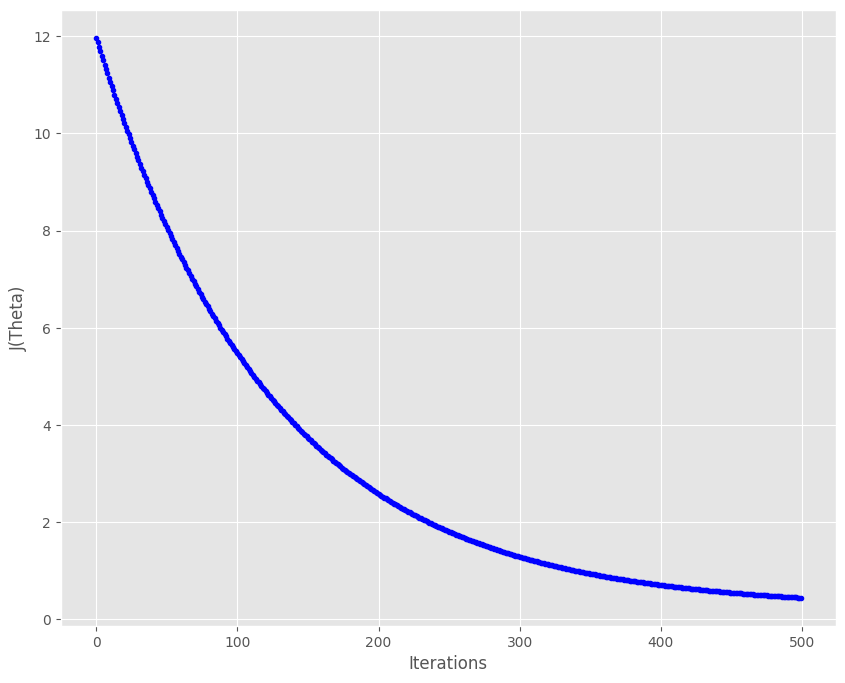

In [21]:
theta = theta_guess.copy()
batch_size = 10

print("Start:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)

# Add a column of ones to the feature matrix X:
X_b = np.c_[X, np.ones((len(X), 1))]

# Run Gradient Descent:
theta, cost_history = minibatch_gradient_descent(
    X_b, y, theta, learning_rate, num_iterations, batch_size = batch_size
)
final_theta['MBGD']= theta

print("End:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))
final_cost['MBGD']= cost_history[-1]

fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(num_iterations), cost_history,'b.')

### **TODO 7:**
Answer the following questions in the next cell.

For these algorithms: GD, SGD, SGD with momentum, MBGD, answer these questions:

1. Assuming the learning rate is the same for all algorithms, what is the worst case runtime complexity of each algorithm. Your answer should be a function of `num_samples`, `num_of_iteration`, and `batch_size`.
2. How would you compare the computation efficiency of each algorithm?
3. How would momentum help with the convergence?
4. How would different learning rate values affect gradient descent algorithms?
5. Does gradient descent always converge to optimum?
6. What are overfitting and underfitting in machine learning? How to reduce overfitting and underfitting? Check this [reference](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/).


Your anwser:

## Linear Regression with PyTorch

Linear Regression can be implemented using PyTorch by defining a linear regression model, specifying a loss function (usually mean squared error), and using an optimization algorithm (e.g., stochastic gradient descent) to update the model parameters to minimize the loss.

### **TODO 8:**
In the next cell write a function to perform linear regression using PyTorch. Check this [reference](https://www.geeksforgeeks.org/linear-regression-using-pytorch/).

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

def train_linear_regression(X, y, optimizer_type='SGD', learning_rate=0.01, num_epochs=1000):
    """
    Train a linear regression model using PyTorch.

    Parameters:
    - X (torch.Tensor): Input data tensor of shape (num_samples, num_features).
    - y (torch.Tensor): Target data tensor of shape (num_samples, num_targets).
    - optimizer_type (str): Type of optimizer to use. Options: 'SGD', 'Adam', etc.
    - learning_rate (float): Learning rate for the optimizer.
    - num_epochs (int): Number of training epochs.

    Returns:
    - model (nn.Module): Trained linear regression model.
    """
    # Define a linear regression model as a Class and within the constructor
    # initilize a linear layer named `linear` instantiated from torch.nn.Linear


    # Instantiate the model


    # Define the loss function and optimizer


    # Training loop


    return model

Run your implementation `train_linear_regression`.
Plot the trained line on top of the data plot.
Print your model parameters $\theta$.

In [23]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
trained_model = train_linear_regression(X_tensor, y_tensor, learning_rate=learning_rate, num_epochs=2000)

# Print the model parameters
weight, bias = trained_model.linear.weight[0].data[0], trained_model.linear.bias.data[0]
print("weight =", weight)
print("bias =", bias)

learned_line = weight * X + bias

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, learned_line, color='red', label='Learned Line')

plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.title('Linear Regression')

NameError: name 'model' is not defined